# Programming for Data Science Practical Examination
## Introduction 

The challenge of this pratical is to explore the public procurement data available in the portal www.base.gov.pt. <br>
Public Procurements are contracts establish between a public institutions (the issuer of a procurement) and a third-party supplier. <br>
Each contract is classified using the Common Procurement Vocabulary (CPV). The CPV classification aims at establishing a single classification system for public procurement in Europe, helping in comparative statistics and regulation. The CPV is a five level hierarchical classification encoded in a nine digit string. For instance the first two digits identify the division, the first three the groups, and so on. You can find more information about the CPVs at https://simap.ted.europa.eu/cpv


We will use a sample dataset extracted from the portal BASE (www.base.gov.pt) that contains information on public procurements executed between 2012 and 2014. Below you can find a step-by-step instructions of what the tasks you need to perform in order to analyse this dataset. Each step indicates the amount of points you can score. Make sure you comment all your code and provide, when requested, a discussion about what you have done and the results obtained.

This examination does not intend to test your ability to:<br>
. perform complex data analysis;<br>
. develop complex data-drive models; <br>
. write optimal algorithmic solutions to a problem. <br>
Instead, it aims at test your ability to implement a pre-planned step by step project in python.

This is an individual activity and weights 40% (8 points) of your final mark.

## Submission Details

The deadline for the submission is May 30th at 23:59, and submission must be done through the corresponding activity in moodle. Your submission should consist of an archive (zip file) containing the following files: <br>
1) A copy of this notebook with your answers; <br>
2) A PDF/HTML version of the notebook with your answers (File -> Download As -> PDF/HTML); <br>

**Submissions done in .rar archives will not be graded.** <br>
**Submissions delivered that are not in a jupyter notebook format will not be graded.**

Good Luck, and enjoy!

## Boilerplate

Before you start, let us make sure you have all the necessary packages in your working environment. To that end run the following cells to install and load all the necessary libraries.

In [2]:
#import sys
#!{sys.executable} -m pip install --upgrade pip --user
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install requests
#!{sys.executable} -m pip install seaborn

Then we load the necessary libraries to execute each of the steps below.

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
import shutil
import requests
from zipfile import ZipFile

In [4]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('StatsModels version ',sm.__version__)

Pandas version  1.2.4
Numpy version  1.19.5
Scipy version  1.6.2
Seaborn version  0.11.1
StatsModels version  0.12.2


In the following steps, please used the alias defined at this step. This will help us to correct your answers and track your steps. Students that fail to use the pre-defined aliases will be incur in a penalization. 

Finally, the following cell downloads the dataset for this project. <br>

__Important: You only need to run this code once. After you have the files, you can comment this block__

In [5]:
#r = requests.get('https://www.dropbox.com/s/n1b6k4pjja2rf5g/PDS_DATA_CSV.zip?dl=1', allow_redirects=True)
#filename = 'Data.zip'
#open(filename, 'wb').write(r.content);
#with ZipFile(filename, 'r') as zipObj:
#    zipObj.extractall('DATA')
#os.remove(filename)
#shutil.rmtree('DATA/__MACOSX')

The above code will store the datafiles in a folder called "DATA" that is in the same filepath as this notebook. <br>
The dataset consists of three xlsx files containing all contracts available in 2018 concerning the contracts issued in 2012, 2013, and 2014 that where available in BASE.

## Exercises (The action starts here)

<b>[Step 1. | 0.5 points ]</b> <br>
Load all the procurement datafiles (contratos2012.csv, contratos2013.csv, and contratos2014.csv) into a single dataframe named <i>data</i>.<br>
Notes: This operation might take a while. When reading data from excel it is safer to always specify the Sheet you want to read. <br>

You also might need to reset the indexes after having a single dataframe (beware of duplicate indexes).

In [6]:
# importando os contratos, definindo 'idcontrato' como indice, e dropando os registros duplicados
cont_2012 = pd.read_csv(r'.\DATA\contratos2012.csv', delimiter = ';', decimal=',')
cont_2013 = pd.read_csv(r'.\DATA\contratos2013.csv', delimiter = ';', decimal=',')
cont_2014 = pd.read_csv(r'.\DATA\contratos2014.csv', delimiter = ';', decimal=',')
data = cont_2012.append(cont_2013.append(cont_2014, ignore_index=True), ignore_index=True)
data.set_index('idcontrato', inplace = True)
data.drop_duplicates(inplace = True)

---

<b>[Step 2. | 0.5 points ]</b><br>
Perform some quick inspection of the data file in order to answer the following questions:
1. How many records does the dataset include?

In [7]:
data.count()

nAnuncio                   16724
tipoContrato              249747
tipoprocedimento          249747
objectoContrato           249747
adjudicantes              249747
adjudicatarios            249741
dataPublicacao            249747
dataCelebracaoContrato    249747
precoContratual           249747
cpv                       249690
prazoExecucao             249747
localExecucao             249747
fundamentacao             249747
dtype: int64

2. How many features/fields does each record have? <br>

In [8]:
data.shape

(249747, 13)

3. What are the names and datatypes of each field?

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249747 entries, 85378 to 5642823
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   nAnuncio                16724 non-null   object 
 1   tipoContrato            249747 non-null  object 
 2   tipoprocedimento        249747 non-null  object 
 3   objectoContrato         249747 non-null  object 
 4   adjudicantes            249747 non-null  object 
 5   adjudicatarios          249741 non-null  object 
 6   dataPublicacao          249747 non-null  object 
 7   dataCelebracaoContrato  249747 non-null  object 
 8   precoContratual         249747 non-null  float64
 9   cpv                     249690 non-null  object 
 10  prazoExecucao           249747 non-null  int64  
 11  localExecucao           249747 non-null  object 
 12  fundamentacao           249747 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 26.7+ MB


Write all the necessary code in the above input cells bellow each respective question. Write here a short answer that discusses the results from all the four above questions. Note, don't just show the ouput of your code, try to write an answer that explains the outputs you have obtained. Understanding is about showing that you are able to communicate the results in a clear manner.

__Answer__ <br>
<div class="alert alert-block alert-info">
    
<b>Question 1:</b> The .shape property of a pandas dataframe is a tuple with two information: the number of rows and the number of attributes of that dataframe. The subject of that analysis has <b>249.747</b> rows.<br>
    
<b>Question 2:</b> The subject of this analysis has <b> 13 different attributes (columns)</b>, besides the “idcontrato”, witch is a index.<br>
    
<b>Question 3:</b> The method .info() also provides an summary of the dataframe, with the name and kind of each attribute.<br>
</div>


<b>[Step 3. | 3 points ]</b><br>
As you have probably noticed our raw data is not exactly the cleanest dataset in the block. Indeed, we will need to perform some parsing in order to obtain a good working data. In that sense, write the necessary code to perform the following steps: <br>

1. Convert any fields with dates to datetime objects;

In [10]:
# the .to_datetime method converts strings to the datetime64 format.
# data.dtypes confirms that the change was effective.

data['dataPublicacao'] = pd.to_datetime(data['dataPublicacao'])
data['dataCelebracaoContrato'] = pd.to_datetime(data['dataCelebracaoContrato'])
data.dtypes

nAnuncio                          object
tipoContrato                      object
tipoprocedimento                  object
objectoContrato                   object
adjudicantes                      object
adjudicatarios                    object
dataPublicacao            datetime64[ns]
dataCelebracaoContrato    datetime64[ns]
precoContratual                  float64
cpv                               object
prazoExecucao                      int64
localExecucao                     object
fundamentacao                     object
dtype: object

2. You will find that in some cases there are multiple entities in the fields fields `cpv`, `adjudicantes` (issuers) and `adjudicatarios` (suppliers), which are separated by ` | `. <br>
How many contrats do we have that contain multiple `cpv`? How many contain multiple `adjudicantes`? How many contain multiple `adjudicatarios`?
How many records would you have if you dropped the procurements where this happens?

In [11]:
data.T

idcontrato,85378,1308086,115568,115569,115570,115571,115572,115573,115574,115575,...,4972136,4972814,5068023,5086051,5087538,5326806,5414071,5490660,5609840,5642823
nAnuncio,4227/2009,4606/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipoContrato,Aquisição de serviços,Empreitadas de obras públicas,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços,...,Aquisição de bens móveis,Aquisição de bens móveis,Aquisição de bens móveis,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços,Aquisição de bens móveis,Aquisição de serviços,Aquisição de serviços,Aquisição de serviços
tipoprocedimento,Concurso público,Concurso público,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,...,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ao abrigo de acordo-quadro (art.º 258.º),Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ao abrigo de acordo-quadro (art.º 258.º),Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral,Ajuste Direto Regime Geral
objectoContrato,Prestação de Serviços para Elaboração do Plano...,09EPS0073 - Empreitada de construção do novo e...,PROJECTO DO SISTEMA DE ADUÇÃO E ARMAZENAMENTO ...,O objecto principal é a contratação de serviço...,PROJECTO DO SISTEMA INTERCEPTOR DE VILA NOVA D...,PROJECTO DO SISTEMA INTERCEPTOR DE POCINHO / C...,LIGAÇÃO DAS REDES DE SANEAMENTO AO LONGO DA FR...,O objecto principal é a contratação de serviço...,LIGAÇÃO DAS REDES DE SANEAMENTO DA ZONA CENTRA...,PROJECTO DAS REDES DE DRENAGEM DE ÁGUAS RESIDU...,...,Aquisição de Máquina a Laser de Gravação e Mar...,Aquisição de gasóleo rodoviário para desenvolv...,AOV,Prestação de Serviços de Arquitetura e Especia...,Serviços móveis,Fornecimento de refeições aos doentes do HSEIT...,Aquisição de viaturaMarca Isuzo Modelo D-Max,Serviço de transporte escolar regular para o a...,AQUISIÇÃO DE SERVIÇOS DE SERVIÇOS DE ASSISTÊNC...,Prestação de serviços de fornecimento de energ...
adjudicantes,506579425 - Município de Faro,505587815 - INST GESTAO FINANC INFRA-ESTRUTURA...,"508160570 - VRSA Sociedade de Gestão Urbana, E...","508160570 - VRSA Sociedade de Gestão Urbana, E...","508160570 - VRSA Sociedade de Gestão Urbana, E...","508160570 - VRSA Sociedade de Gestão Urbana, E...","508160570 - VRSA Sociedade de Gestão Urbana, E...","508160570 - VRSA Sociedade de Gestão Urbana, E...","508160570 - VRSA Sociedade de Gestão Urbana, E...","508160570 - VRSA Sociedade de Gestão Urbana, E...",...,504514547 - ASSOC. FORMAÇÃO PROF. E DESENV. DO...,504650939 - Centro Social de Santa Maria de Sa...,508203970 - Instituto Nacional de Medicina Leg...,503993506 - Centro Paroquial e Social de S. Jorge,503841560 - Fundação Aga Khan Portugal,512105030 - Hospital de Santo Espírito da Ilha...,510839959 - União das Freguesias de São Pedro ...,512048746 - Associação de Desenvolvimento da I...,600084264 - Agrupamento de Escolas Abade de Ba...,500745749 - Cruz Vermelha Portuguesa
adjudicatarios,507358830 - Land Design -Paisagismo e Ambiente...,"508195985 - Ferreira Edinorte - Sul, ACE","505107929 - FTD, Consultores de Engenharia, Lda.",501453989 - Ecoserviços - Gestão de Sistemas E...,504959239 - Cota 200 - Projetos e Consultoria ...,504959239 - Cota 200 - Projetos e Consultoria ...,"502305401 - Viés - Consultoria, Estudos e Proj...",501453989 - Ecoserviços - Gestão de Sistemas E...,"502305401 - Viés - Consultoria, Estudos e Proj...",504959239 - Cota 200 - Projetos e Consultoria ...,...,500345821 - Tecmacal - Equipamentos Industriai...,504502425 - Irmãos Beleza - Comércio de Combus...,"502167610 - Leaseplan Portugal , Lda",114671931 - Manuel Soares da Silva,502604751 - NOS - Comunicações S.A.,500347506 - EUREST (PORTUGAL) - S

In [12]:
# creating aditional rows with the count of entities on the cpf, adjudicantes and adjuticarios fields
# to count those entities, we are going to utilize the count of ‘|’ + 1:

data['count_cpv'] = data['cpv'].str.count('\\|') + 1
data['count_adjudicantes'] = data['adjudicantes'].str.count('\\|') + 1
data['count_adjudicatarios'] = data['adjudicatarios'].str.count('\\|') + 1

In [11]:
# registers with more than one entity on the CPV field:
data[data['count_cpv'] > 1].shape[0]

3348

In [12]:
# registers with more than one entity on the Adjuticantes field:
data[data['count_adjudicantes'] > 1].shape[0]

952

In [13]:
# registers with more than one entity on the Adjudicatarios field:
data[data['count_adjudicatarios'] > 1].shape[0]

3085

In [14]:
# total registers with more than one entity on the CPV, Adjuticantes and Adjudicatarios field
# in case those registers with multiple entities are dropped, those are the left over registers:

data[(data['count_cpv'] == 1 ) & (data['count_adjudicantes'] == 1) & (data['count_adjudicatarios'] == 1)].shape[0]

242462

3. Let's deal with multiple records. For each feature `cpv`, `adjudicantes` (issuers) and `adjudicatarios` (suppliers) you have three options:
    * A) Drop procurement where you have more than 1 `cpv` or `adjudicantes` or `adjudicatarios`
    * B) Pick the first one for each procurement (e.g.: [111, 222, 333] -> 111)
    * C) Create a row for each different value (explode) in `cpv`, `adjudicantes`, `adjudicatarios` (e.g.: [111, 222, 333] would create 3 rows, 111, 222, and 333). If you choose this option, divide the proc value `precoContratual` by the number of rows for that procurement
    
__Note: This is a subjective choice and as such you should justify your decision.__

3.1. Break the field `cpv` into two columns named `cpvID` and `cpvDesc`.<br>
   * The field `cpvID` should retain the CPV id, while the `cpvDesc` its Description <br>
   * Example: _"72416000-9, Fornecedores de aplicações"_ should lead to a `cpvID` equal to "72416000-9" and a `cpvDesc` equal to "Fornecedores de aplicações" <br>

In [13]:
# option C:  create a new register with different values of CPF and etc. (explode):
# 1) split the columns CPF, adjudicantes and adjudicatários with the .split() method into lists:


data['cpv'] = data['cpv'].str.split('|')
data['adjudicantes'] = data['adjudicantes'].str.split('|')
data['adjudicatarios'] = data['adjudicatarios'].str.split('|')

# 2) split list of the cpv, adjudicantes e adjuticarios, duplicatiing those registries:
data = data.explode('cpv')
data = data.explode('adjudicantes')
data = data.explode('adjudicatarios')

# 3) dropping the indexes:
data.reset_index(inplace = True)

#4) creating and auxiliary dataframe to calculate the value of the precoContratual of each registry
#(precoContratual / number of registries)

media = data.pivot_table(index = ['idcontrato'], aggfunc='size').to_frame('count')
media = pd.merge(data[['idcontrato','precoContratual']].groupby(['idcontrato'], as_index = False).mean(), 
                 media,
                 on = 'idcontrato')
media['precoContratualMedio'] = media['precoContratual']/media['count']

# 5) final dataframe:
data = pd.merge(data, media[['idcontrato', 'precoContratualMedio']], 
                      on = 'idcontrato',
                      how =  'left')
data.drop('precoContratual', axis='columns', inplace=True)
data.rename({'precoContratualMedio':'precoContratual'}, axis = 1, inplace = True)

# 6) dividing the columns cpf in new columns (cpvID e cpvDesc):

data['cpv'] = data['cpv'].str.strip()
data[['cpvID','cpvDesc']] = data['cpv'].str.split(" - ",expand=True)



3.2. In the fields `adjudicantes` (issuers) and `adjudicatarios` (suppliers) you should have noticed that it includes both the name and the fiscal numbers (NIF) of the participating institutions. For each field, split each record into two new fields: 
   * `adjudicantes`: `issuerNIF` and `issuerName`
   * `adjudicatarios`: `supplierNIF` and `supplierName`
   * example: _"506579425 - Município de Faro"_ should have a NIF = 506579425 and Name = Município de Faro

In [14]:
# the .str.strip() method cleans the string, removing the spaces at the beginning and end of the register
# the split() method will separate the registry into two columns by the expand = True parameter, and the "int 1" means that
# the split will happens only after the first occurrence of the separator (' - ').

data['adjudicantes'] = data['adjudicantes'].str.strip()
data['adjudicatarios'] = data['adjudicatarios'].str.strip()
data[['issuerNIF','issuerName']] = data['adjudicantes'].str.split(" - ", 1, expand=True)
data[['supplierNIF','supplierName']] = data['adjudicatarios'].str.split(" - ", 1, expand=True)


4. Display an example for a single row, showing that you have now the issuer and the supplier splitted into `issuerNIF`, `issuerName`, `supplierNIF`, and `supplierName`

In [15]:
# selecting the first regiter of the final dataframe. The contract number #85378 has thow different suppliers.
# Land Design -Paisagismo and Ambiente Ldª e Site Plan - Consultores em Planeamento e Urbanismo:

data.loc[[0]].T

,0
idcontrato,85378
nAnuncio,4227/2009
tipoContrato,Aquisição de serviços
tipoprocedimento,Concurso público
objectoContrato,Prestação de Serviços para Elaboração do Plano...
adjudicantes,506579425 - Município de Faro
adjudicatarios,507358830 - Land Design -Paisagismo e Ambiente...
dataPublicacao,2012-02-21 00:00:00
dataCelebracaoContrato,2012-02-13 00:00:00
cpv,79421200-3 - Serviços de concepção de projecto...


In [16]:
data.loc[[1]].T

,1
idcontrato,85378
nAnuncio,4227/2009
tipoContrato,Aquisição de serviços
tipoprocedimento,Concurso público
objectoContrato,Prestação de Serviços para Elaboração do Plano...
adjudicantes,506579425 - Município de Faro
adjudicatarios,508371970 - Site Plan - Consultores em Planeam...
dataPublicacao,2012-02-21 00:00:00
dataCelebracaoContrato,2012-02-13 00:00:00
cpv,79421200-3 - Serviços de concepção de projecto...


Discuss you approach here, and explain the rational behind your decisions.

__Answer__ <br>
<div class="alert alert-block alert-info">
<b>Question 1:</b> The method .to_datetime converts a string to datetime

<b>Questão 2:</b> The dataframe has 3.348 registries with more than one CPV, 952 registries with more than one Adjuticante and 3.085 registtries with more than one Adjuticatário. In case all those registries were dropped, the dataframe would be left with 242.462 registries.
    
<b>Questão 3:</b> For this analysis, the chosen approach was the approach ‘C’, where we duplicated the contracts by the number of repeated registries, and we split the total value of the contract by the number of registries. This approach was chosen because in that way, we maintained the same information of the original dataframe (total number of different adjuticantes, adjuticatários and cpvs), and still would be able to maintain the total value of contracts. The first option was not adequate because we would lost contracts with that, and the second alternative we would lost the total number of adjudicantes and adjucatarios.

    
<b>Questão 4:</b> Using as an example the contract number #85378, witch is the first registry of the dataframe. This contract has two different suppliers, as we can see in duplicated ‘idcontrato’ in data.loc[[0]] and data.loc[[1]]. The two suppliers for this contract are Land Design -Paisagismo and Ambiente Ldª e Site Plan - Consultores em Planeamento e Urbanismo.
</div>


---

<b>[Step 4. | 5 points ]</b><br>
Let us do some exploratory analysis of the data. The goals is to develop some familarity with the data, which we will do by answering some simple questions. Knowing which questions to ask is an important step for any successful data science project. In that sense, write down the necessary code to answer the following questions:

(Consider reporting the results using a meaningful visualization.)

1. What is the total value of procurements per month? Consider the `dataCelebracaoContrato` as your reference date. 

In [19]:
################################################### Begining of the data cleaning ###################################################
# Previous analysis of the data_1: distribution of the contract values
# the negative contracts sum up -1,2 MM euros
# Those contracts may refer to reversals, and will not be analised

data[['idcontrato', 'precoContratual']].loc[(data['precoContratual'] < 0)].groupby('idcontrato').sum().sum()

precoContratual   -1.206680e+06
dtype: float64

<AxesSubplot:ylabel='Frequency'>

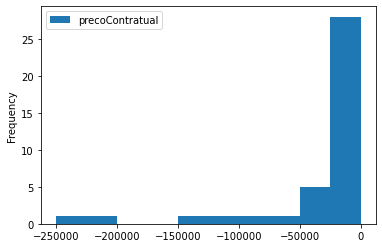

In [20]:
# distribution of the contracts with negative values:
data[['idcontrato', 'precoContratual']].loc[(data['precoContratual'] < 0)]\
.groupby('idcontrato').sum().plot(kind = 'hist', bins = 10)

In [21]:
# dropping those values:
data = data.loc[data['precoContratual'] > 0]

In [17]:
# Previous analysis of the data_2: distribution of the value of the contracts
# the contracts with values less than 100 euros sum up 467.100 euros,
# a small part of the sum of the contracts (12 trillions of Euros)
# Those micro contracts will not be analyzed. 

data[['idcontrato', 'precoContratual']].loc[(data['precoContratual'] < 100)].groupby('idcontrato').sum().sum()

precoContratual   -739580.193175
dtype: float64

In [18]:
data[['idcontrato', 'precoContratual']].groupby('idcontrato').sum().sum()

precoContratual    1.292592e+10
dtype: float64

<AxesSubplot:ylabel='Frequency'>

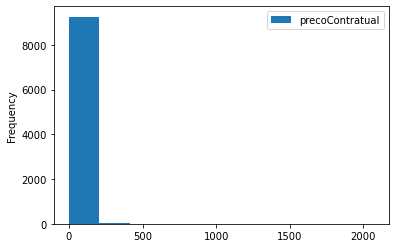

In [24]:
# distribution of the contracts with values less than 100 euros.
data[['idcontrato', 'precoContratual']].loc[(data['precoContratual'] < 100)]\
.groupby('idcontrato').sum().plot(kind = 'hist', bins = 10)

In [25]:
# dropping aprox. 9.000 micro contracts with values less than 100 euros:
data = data.loc[data['precoContratual'] > 100]

In [26]:
# Previous analysis of the data_3: distribution of the contract values with a duration less than 0:
# 6,2 MM euros

data[['idcontrato', 'precoContratual']].loc[data['prazoExecucao'] <= 0].groupby('idcontrato').sum().sum()

precoContratual    6205555.23
dtype: float64

<AxesSubplot:ylabel='Frequency'>

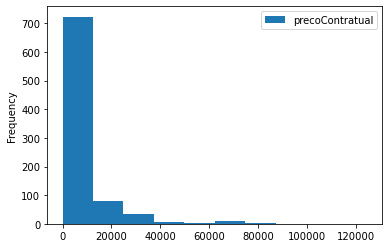

In [19]:
# distribution of contracts with duration less than 0.
data[['idcontrato', 'precoContratual']].loc[data['prazoExecucao'] <= 0]\
.groupby('idcontrato').sum().plot(kind = 'hist', bins = 10)

In [20]:
# for contracts with duration == 1, a day of execution was added.
data.loc[data['prazoExecucao'] <= 0, 'prazoExecucao'] = 1

################################################### End of Data Cleaning ###################################################

---

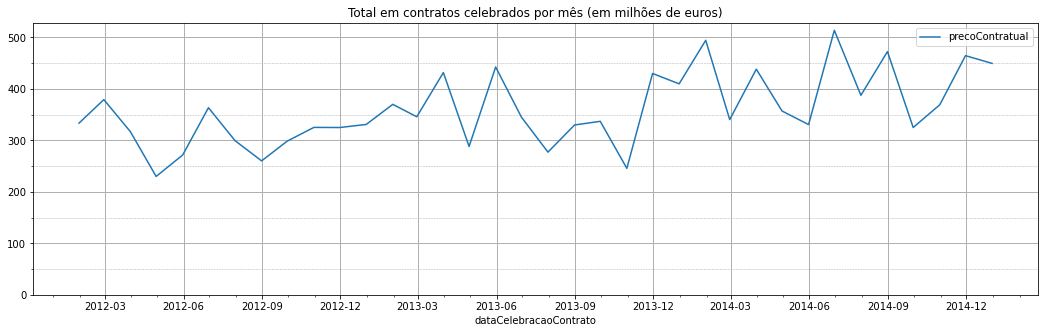

In [21]:
# plotting the total of contracts made by month, in millions of euros: 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import matplotlib.dates as mdates
plt.figure(figsize = (18, 5))
plt.title('Total em contratos celebrados por mês (em milhões de euros)')

ax = sns.lineplot(data = data[['precoContratual', 'dataCelebracaoContrato']].groupby(pd.Grouper(key = 'dataCelebracaoContrato', freq='M')).sum()/1000000)
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(50))

major_locator = mdates.MonthLocator(interval=3)
minor_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)

plt.ylim(ymin=0)
plt.grid(which='major', linewidth=1)
plt.grid(which='minor', linestyle='--', axis = 'y', linewidth = 0.5)
plt.show()

2. How many procurements do have been issied per month of each year?

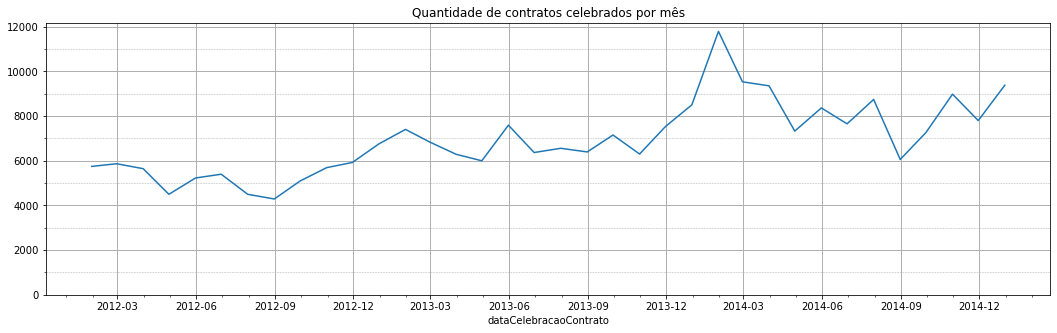

In [22]:
# total of contrats made, by month:
plt.figure(figsize = (18,5))
plt.title('Quantidade de contratos celebrados por mês')

ax = sns.lineplot(data = data[['idcontrato', 'dataCelebracaoContrato']].drop_duplicates().value_counts('dataCelebracaoContrato').groupby(pd.Grouper(freq='M')).sum())
ax.yaxis.set_major_locator(MultipleLocator(2000))
ax.yaxis.set_minor_locator(MultipleLocator(1000))

major_locator = mdates.MonthLocator(interval=3)
minor_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)

plt.ylim(ymin=0)
plt.grid(which='major', linewidth=1)
plt.grid(which='minor', linestyle='--', axis = 'y', linewidth = 0.5)
plt.show()

3. What is the distribution of values? In other words, what is the proportion of procurements that have value X?  Can you build a visualization to highlight the what you found more interesting and discuss it? <br>

Note: Consider working with the Logarithm base 10 of values as they provide a more easy to interpret value; Consider exploring different number of bins for the X values.

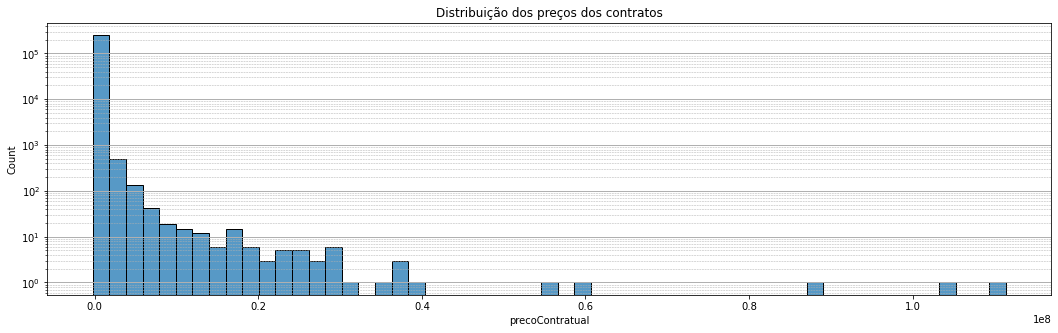

In [23]:
# distribution of contrats, in log scale

preco_contrato = data[['idcontrato', 'precoContratual']].groupby('idcontrato').sum().reset_index()

plt.figure(figsize = (18, 5))
plt.title('Distribuição dos preços dos contratos')

ax = sns.histplot(preco_contrato, x = 'precoContratual', bins = 55)

plt.grid(which='major', axis = 'y', linewidth=1)
plt.grid(which='minor', linestyle='--', axis = 'y', linewidth = 0.5)
plt.gca().set_yscale("log")
plt.show()

4. In the dataset, how many issuing Institutions are there? And how many suppliers?

In [24]:
data[['issuerNIF', 'issuerName']].drop_duplicates()

,issuerNIF,issuerName
0,506579425,Município de Faro
2,505587815,"INST GESTAO FINANC INFRA-ESTRUTURAS JUSTIÇA, IP"
3,508160570,"VRSA Sociedade de Gestão Urbana, EM, SA"
11,509107630,AdRA - Águas da Região de Aveiro
12,506415082,Município de Coimbra
...,...,...
271518,503017728,Orsifor - Centro Formação Profissiona da Moita...
271528,507033647,Freguesia de Braga (São Vítor)
271530,504341111,Magensinus - Empresa Promotora de Serviçiços d...
271551,600080196,Agrupamento de Escolas Lousada Este (SNCP)


In [25]:
# There is 4.3071 different issuers
data[['supplierNIF', 'supplierName']].drop_duplicates()

,supplierNIF,supplierName
0,507358830,Land Design -Paisagismo e Ambiente Ldª.
1,508371970,Site Plan - Consultores em Planeamento e Urban...
2,508195985,"Ferreira Edinorte - Sul, ACE"
3,505107929,"FTD, Consultores de Engenharia, Lda."
4,501453989,"Ecoserviços - Gestão de Sistemas Ecológicos, Lda"
...,...,...
271553,510842500,"Padaria Tia Olimpia - Proveitotimo, Lda"
271560,504502425,Irmãos Beleza - Comércio de Combustível e Cons...
271562,114671931,Manuel Soares da Silva
271565,509008380,Freguesia de Carvalho


5. What services has ISEGI-Inst Superior de Estatistica e Gestão de Informação da UNL (NIF: 502322152) supplied? And who are the top three issuers/beneficiaries of such services?

In [26]:
# the services provided by ISEGI-Inst Superior de Estatistica e Gestão de Informação da UNL was:
data[['objectoContrato']].loc[data['supplierNIF'] == '502322152']

,objectoContrato
36540,Estudo de avaliação da qualidade dos serviços ...
63873,Manutenção do SIPACE referente ao 2º semestre ...
102833,AVALIAÇÃO DE SATISFAÇÃO DOS CLIENTES IPQ REFER...
113334,Aquisição de um curso de Pós-Graduação em gest...
127466,Aquisição de serviços para a realização de um ...
137398,"Serviços de Manutenção, Consolidação e evoluç..."
150800,Avaliação da Satisfação dos Clientes do IPQ re...
161863,Aquisição de Serviços de Elaboração da Revisão...
193104,Contratação de serviço de manutenção do SIPACE
193112,Desenvolvimento da aplicação SIPACE


In [27]:
# The biggest contractors of SEGI-Inst Superior de Estatistica e Gestão de Informação da UNL:
data[['issuerName', 'precoContratual']].loc[data['supplierNIF'] == '502322152']\
.groupby('issuerName').sum().sort_values(by='precoContratual',ascending=False).head(3)

,precoContratual
issuerName,
"Instituto da Mobilidade e dos Transportes, I. P.",216134.000000
"ARH - Administração da Região Hidrográfica do Algarve, I.P.",91566.666667
"Administração Central do Sistema de Saúde, I. P.",74250.000000


6. What are the top 10 supplied services (CPV) contracted by Hospital de Santa Maria Maior (NIF: 506361381)?

In [28]:
# The 10 top suppliers of Hospital de Santa Maria Maio was:
data[['cpvDesc', 'precoContratual']].loc[data['issuerNIF'] == '506361381']\
.groupby('cpvDesc').sum().sort_values(by='precoContratual',ascending=False).head(10)

,precoContratual
cpvDesc,
Electricidade,511658.692281
Medicamentos vários,188839.715000
Reagentes de laboratório,94468.890000
"Equipamento médico, medicamentos e produtos para cuidados pessoais",76867.200000
Equipamento médico,73950.380000
Serviços de segurança,55776.000000
Medicamentos para o sangue e para os órgãos hematopoiéticos,55247.260000
Antineoplásicos e imunomoduladores,54176.200000
Serviços de limpeza,51908.520000


7. What services (CPV) has Novo Banco, S.A. (NIF: 513204016) supplied? Agregate the output by CPV and sort by descing order of total value.

In [29]:
# The Novo Banco, S.A. provided the following services. The main service was Serviços de banca.
data[['cpvDesc', 'precoContratual']].loc[data['supplierNIF'] == '513204016']\
.groupby('cpvDesc').sum().sort_values(by='precoContratual',ascending=False)

,precoContratual
cpvDesc,
Serviços de banca,1750800.0
Automóveis de passageiros,19918.7
Serviços das agências de cobrança,16372.8


8. Can you measure the correlation between the length/duration of contract `prazoExecucao` and the final value `precoContratual`? Are longer contracts more costly? <br>

Note: Consider doing the log transform of both variables to obtain more meaningful results.

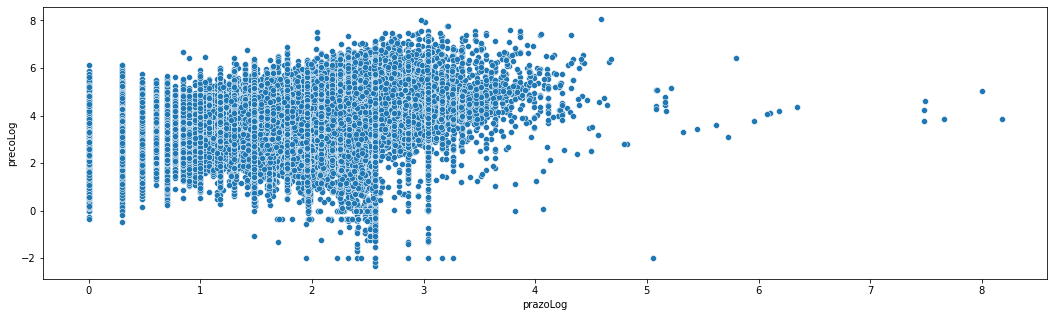

In [30]:
# Scatterplot showing the correlationg between duration and price of the contract.
# despite the big dispersion of data, we can see that the duration of the contract isn’t a good predictor for contracts longer than 150 days
# from 150 days forward, the duration of the contract seems to influence positively on the price of the contract, despite keeping and high dispersion of data

plot = data[['idcontrato','prazoExecucao', 'precoContratual']].groupby('idcontrato').sum()
plot['prazoLog'] = plot['prazoExecucao'].apply(np.log10)
plot['precoLog'] = plot['precoContratual'].apply(np.log10)


plt.figure(figsize = (18, 5))
sns.scatterplot(data = plot,
               x = 'prazoLog',
               y = 'precoLog')
plt.show()

Do a short discussion summarizing the main findings you obtained from exploring the data through the above questions.

__Answer:__ <br>
<div class="alert alert-block alert-info">
    
Before the begining of the analysis, a brief data cleaning step was executed:
<ul>
    <li>Dropping duplicates
    <li>Dropping contracts with irrelevant or negative values
    <li> Adjusting the duration of contracts with time of execution from ==0 to == 1
It was assumed that the dropped values didn’t impact on the overall analysis and introduce less noise in the projections made on the next steps
The full detail of the impact can be evaluated on the seps above.  
<br>
<b>Question 1:</b> A brief temporal analysis of the total (in euros) of contracts made shows that 2013, the Monthly total was between 300 and 400 millions euros. In 2014 foward, this total grew up to something between 400 and 500 millions euros.
<br>
<b>Question 2:</b> In a similar analysis, we can see that the total contracts made by month grew in the same period that the total value of contracts grew, in about 2.000 contracts per month.
<br>
<b>Question 3:</b> As seen in the histogram of contract values, we can notice that most of them are concentrated in values up until 400 million euros. Two super contracts draw attention with values above 1.000 MM euros, witch are the contracts 848753 and contract 1396275.
<br>
<b>Question 4 to 7:</b> They were answered in the respective codes above. Refer to the respective piece of code to more details.
<br>
<b>Question 8:</b> For contracts less than 150 days, it seems to have low correlation between the duration and total value of the contract, perhaps because they are specific types of short term contracts. For contracts above 150 days in duration, we can see a positive correlation between duration and total value of the contract. 
</div>


---

<b>[Step 5. | 5 points ]</b> You probably have noticed that our dataset includes procurements isseued by municipalities (Câmara Municipal or Município). Interesting hein? Next, we will explore municipality procurement data a bit more in detail. To that end, we will need to process our procurement dataset, in order to obtain the procurements of each municipality, aggregate the data and obtain the relevant metrics.

However, the data is not uniform as some typos lead to the same municipality having different names. Moreover, there are municipal companies that have a different fiscal code than the municipalities. To make it simple, let us ignore municipal companies. Moreover, we have prepared beforehand a .csv file that lists all the NIF ids associated wit each municipality.

1. Download the file MunicipiosNIF.csv from Moodle and load it into a dataframe;

In [32]:
# importing the MunicipiosNIF dataset. 
mun_nif = pd.read_csv(r'.\DATA\MunicipiosNIF.csv', delimiter = ';')
mun_nif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NIF           308 non-null    int64 
 1   Municipality  308 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


2. Create a new dataframe that contains only the procurements issued by municipalities. Use the dataframe created in the <b>previous point (Question 1 of Step 5)</b> to aid your filtering.

In [33]:
# merge works well for joining those two datasets:
mun_nif.rename({'NIF':'issuerNIF'}, axis = 1, inplace = True)
mun_nif['issuerNIF'] = mun_nif['issuerNIF'].apply(str)
data_mun = pd.merge(data, mun_nif,
                   on = 'issuerNIF')
data_mun.head(5).T

,0,1,2,3,4
idcontrato,85378,85378,306651,339619,339620
nAnuncio,4227/2009,4227/2009,2063/2011,3183/2011,3183/2011
tipoContrato,Aquisição de serviços,Aquisição de serviços,Concessão de serviços públicos,Outros,Outros
tipoprocedimento,Concurso público,Concurso público,Concurso público,Concurso público,Concurso público
objectoContrato,Prestação de Serviços para Elaboração do Plano...,Prestação de Serviços para Elaboração do Plano...,Concessão de exploração de estacionamento nas ...,Fornecimento contínuo de produtos químicos par...,Fornecimento contínuo de produtos químicos par...
adjudicantes,506579425 - Município de Faro,506579425 - Município de Faro,506579425 - Município de Faro,506579425 - Município de Faro,506579425 - Município de Faro
adjudicatarios,507358830 - Land Design -Paisagismo e Ambiente...,508371970 - Site Plan - Consultores em Planeam...,"503496553 - Masitrave, Lda",504486799 - Sagilab-Laboratório de Análise Téc...,506565165 - Prodyalca - Comércio de Produtos Q...
dataPublicacao,2012-02-21 00:00:00,2012-02-21 00:00:00,2012-02-16 00:00:00,2012-03-16 00:00:00,2012-03-16 00:00:00
dataCelebracaoContrato,2012-02-13 00:00:00,2012-02-13 00:00:00,2012-01-02 00:00:00,2012-08-02 00:00:00,2012-02-20 00:00:00
cpv,79421200-3 - Serviços de concepção de projecto...,79421200-3 - Serviços de concepção de projecto...,63712400-7 - Serviços de estacionamento,98300000-6 - Serviços diversos,39830000-9 - Produtos de limpeza


2. What are the top 10 suppliers in terms of value of the municipality of Lisbon?

In [35]:
# Lisboa's NIF: 500051070
data_mun[['supplierName', 'precoContratual']].loc[data_mun['issuerNIF'] == '500051070']\
.groupby('supplierName').sum().sort_values('precoContratual',ascending=False).head(10)

,precoContratual
supplierName,
"Securitas - Serviços e Tecnologia de Segurança, S.A.",7073688.480
"Habitamega Construções, S.A.",7043241.580
"Euromex, Lda.",6323077.340
"EDP Comercial, SA",5823386.230
"CONSTRUTORA UDRA, LDA.",5055108.885
"LUIS FRAZÃO - CONSTRUÇÃO CIVIL E OBRAS PÚBLICAS, S.A.",5035111.590
"Controp-Congevia,SA",5032353.510
"HCI - CONSTRUÇÕES, SA",4761027.330
"Teixera, Pinto &amp; Soares, S.A.",4446533.160


3. What are the top ten services in terms of value supplied to Lisbon?

In [42]:
data_mun[['cpvDesc', 'precoContratual']].loc[data_mun['issuerNIF'] == '500051070']\
.groupby('cpvDesc').sum().sort_values('precoContratual',ascending=False).head(10)

,precoContratual
cpvDesc,
Construção de edifícios destinados à educação ou à investigação,17961497.84
Outros serviços,13960549.01
Trabalhos de paisagismo,10813002.25
Construção,10531445.24
Serviços de limpeza,10471798.04
Obras de recuperação,8148441.68
Serviços de vigilância,8109278.67
Construção de infantário,7849312.67
Construção de edifícios multifuncionais,6578226.59


4. <br>
* 4.1. What is the most common `tipoprocedimento` of procurements issued by municipalities? <br>
* 4.2 Create ranges for the procurement values. For each interval, estimate the most popular `tipoprocedimento`. What did you discover? <br>
    __Remember to justify your intervals: Did you create intervals of equal observation frequency or intervals of equal range values?__

In [43]:
# 4.1 most common type of procedure:
data_mun[['idcontrato', 'tipoprocedimento']].drop_duplicates()\
.groupby('tipoprocedimento').count().sort_values('idcontrato', ascending = False)

,idcontrato
tipoprocedimento,
Ajuste Direto Regime Geral,54883
Concurso público,5562
Ao abrigo de acordo-quadro (art.º 258.º),381
Ao abrigo de acordo-quadro (art.º 259.º),288
Concurso limitado por prévia qualificação,51


In [44]:
# we see that the most frequent type of contract is not the one that represents the largest volume of expenditure 
# by municipalities
# This indication is that the average value of the Concurso Público type contract must be greater than the average value of the
# Ajuste Direito Regime Geral type

data_mun[['precoContratual', 'tipoprocedimento']]\
.groupby('tipoprocedimento').sum().sort_values('precoContratual', ascending = False)

,precoContratual
tipoprocedimento,
Concurso público,1.695855e+09
Ajuste Direto Regime Geral,1.573006e+09
Ao abrigo de acordo-quadro (art.º 258.º),6.359086e+07
Ao abrigo de acordo-quadro (art.º 259.º),5.322314e+07
Concurso limitado por prévia qualificação,4.770656e+07


In [45]:
#4.2 Distribution of Procedure Types by Contract Values
plot = data_mun[['idcontrato','precoContratual', 'tipoprocedimento']]\
.groupby(['tipoprocedimento','idcontrato'], as_index = False).sum().set_index('idcontrato')
plot

,tipoprocedimento,precoContratual
idcontrato,,
170263,Ajuste Direto Regime Geral,149351.24
202781,Ajuste Direto Regime Geral,120629.30
204089,Ajuste Direto Regime Geral,12345.65
251273,Ajuste Direto Regime Geral,21640.87
297286,Ajuste Direto Regime Geral,46890.80
...,...,...
4976992,Concurso público,228413.39
5036432,Concurso público,167000.00
5040451,Concurso público,143712.66


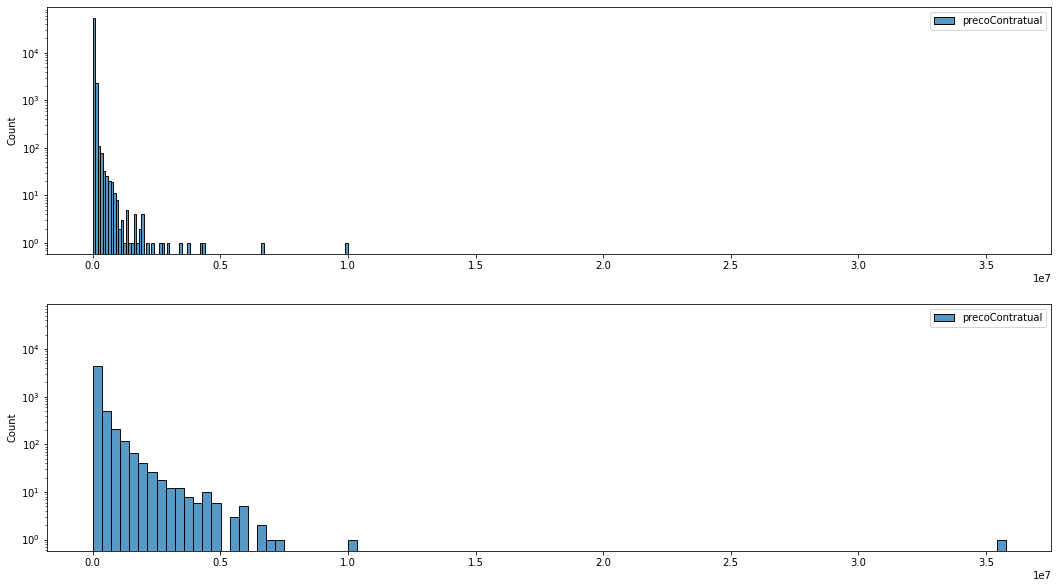

In [46]:
fig, ax = plt.subplots(2, figsize = (18,10), sharey = True)

sns.histplot(ax = ax[0], data = plot.loc[plot['tipoprocedimento'] == 'Ajuste Direto Regime Geral'], bins = 100)
sns.histplot(ax = ax[1], data = plot.loc[plot['tipoprocedimento'] == 'Concurso público'], bins = 100)
#sns.histplot(ax = ax[1,0], data = plot.loc[plot['tipoprocedimento'] == 'Ao abrigo de acordo-quadro (art.º 258.º)'], bins = 100)
#sns.histplot(ax = ax[1,1], data = plot.loc[plot['tipoprocedimento'] == 'Ao abrigo de acordo-quadro (art.º 259.º)'], bins = 100)
#sns.histplot(ax = ax[2,0], data = plot.loc[plot['tipoprocedimento'] == 'Concurso limitado por prévia qualificação'], bins = 100)

xmin, xmax = ax[1].get_xlim()
ax[0].set_xlim(xmin, xmax)


plt.gca().set_yscale("log")

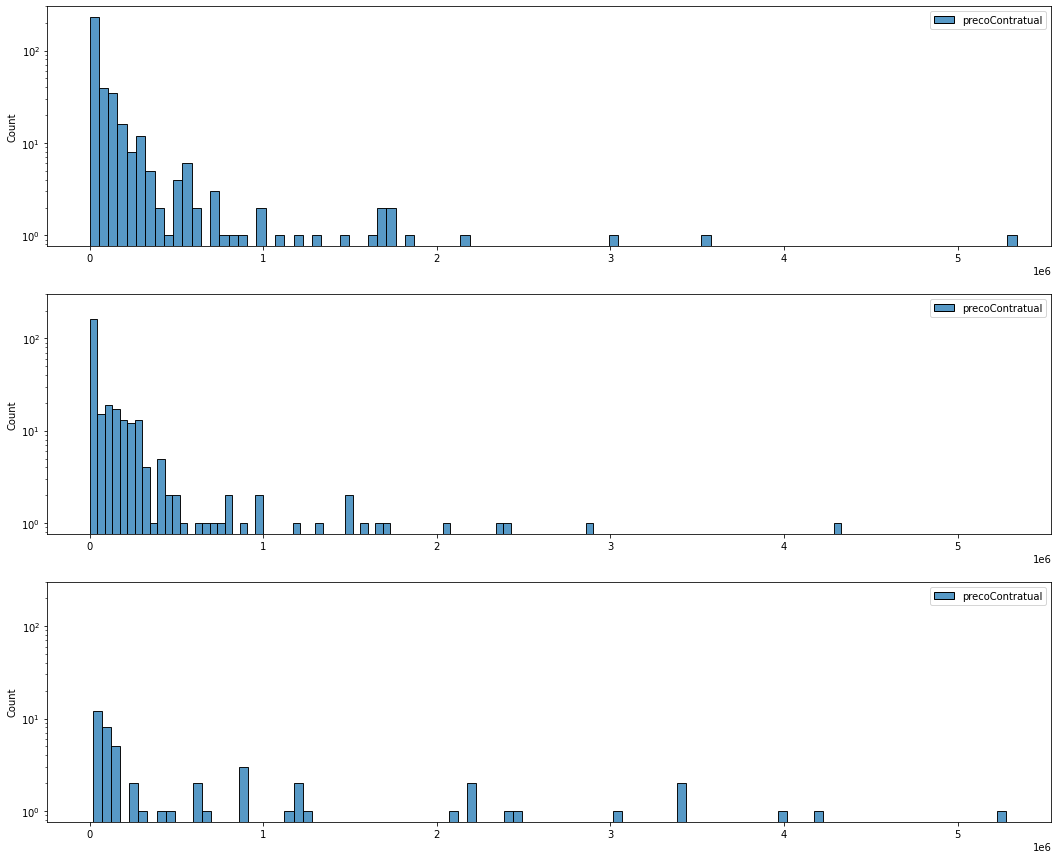

In [47]:
fig, ax = plt.subplots(3, figsize = (18,15), sharey = True)

#sns.histplot(ax = ax[0], data = plot.loc[plot['tipoprocedimento'] == 'Ajuste Direto Regime Geral'], bins = 100)
#sns.histplot(ax = ax[1], data = plot.loc[plot['tipoprocedimento'] == 'Concurso público'], bins = 100)
sns.histplot(ax = ax[0], data = plot.loc[plot['tipoprocedimento'] == 'Ao abrigo de acordo-quadro (art.º 258.º)'], bins = 100)
sns.histplot(ax = ax[1], data = plot.loc[plot['tipoprocedimento'] == 'Ao abrigo de acordo-quadro (art.º 259.º)'], bins = 100)
sns.histplot(ax = ax[2], data = plot.loc[plot['tipoprocedimento'] == 'Concurso limitado por prévia qualificação'], bins = 100)

xmin, xmax = ax[2].get_xlim()
ax[0].set_xlim(xmin, xmax)
ax[1].set_xlim(xmin, xmax)

plt.gca().set_yscale("log")

__Answers:__ <br>
<div class="alert alert-block alert-info">
<b>Question 1 a 3:</b> They were answered in the respective codes above. Refer to the outputs of the respective codes for further details.
<br>
<br>
<b>Question 4:</b> The types of procedure most requested by municipalities are as follows:
<ul>
    <li>Ajuste Direto Regime Geral: 54.883 times
    <li>Concurso público: 5562 times
    <li>Ao abrigo de acordo-quadro (art.º 258.º): 381 times
    <li>Ao abrigo de acordo-quadro (art.º 259.º): 288 times
    <li>Concurso limitado por prévia qualificação: 51 times
<br>
 To analyze the distribution of contract prices, we chose to use a histogram chart from the seaborn library. Although using the .cut() function it was possible to perform the same analysis, plotting by seaborn is the fastest and most visual way to analyze the data. Seaborn automatically distributes the bins over ranges of constant values, and using the same scale of values on the x and y axis, the comparison between the distributions becomes fair.       
We note that the first two types of contract have the largest range of values (up to 5 million euros), while the others have lower average values (except for outliers, up to 1 million euros). Although contracts of the Ajuste Direto Regime Geral contract type are approximately 10x more frequent, by distributing the contract values we see that most of them are concentrated in contracts of lower value. The distribution of contracts of the Concurso Público type is 'wider', showing that the average value of contracts is actually higher than that of the Direct Adjustment General Regime type contracts.
When we look at the other types of contracts (Ao abrigo de acordo-quadro (art.º 258.º), Ao abrigo de acordo-quadro (art.º 259.º) e Concurso limitado por prévia qualificação) we see a similar distribution between them , indicating contracts with average prices very close to each other. It is also evident that the contract of the type Concurso limitado por prévia qualificação is much less frequent than the others
</div>

---

<b>[Step 6. | 4 points ]</b> <br>
Next, and in the spirit of a vast scientific literature on Urban Scaling Laws (https://tinyurl.com/y8ohmzx7), let us investigate the relationship between the number and value of procurements issued by municipalities and their population size.

To that end we will need to download and load an additional data file that includes the population size of each municipality. You can find the population data for download on Moodle. This dataset was obtained from the portal pordata. As is the case in many data science projects we don't have a perfect matching key between the population data and the procurement data we have been working so far. 

1. Download the file `popsize.csv` from Moodle and load it to a dataframe. Explore the dataframe and explain how can you link this data to the municipalities procurement data.

In [37]:
# importing popsize dataset, and converting the field "population" to a numeric value
popsize = pd.read_csv(r'.\DATA\popsize.csv', delimiter = ';')
popsize['Population'] = popsize['Population'].str.replace(" ","").astype(float)

In [38]:
popsize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    308 non-null    object 
 1   Population  308 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [39]:
# Clearing the Municipality column, to use it as a key to add population values to the dataset
# Renaming the Location field in the popsize dataframe to use it as a key

data_mun['Municipality'] = data_mun['Municipality'].str[13:].str.strip()
popsize.rename({'Location':'Municipality'}, axis = 1, inplace = True)

In [40]:
# Using how = 'left', we guarantee that we will not lose any records in the source dataset
# The fields where data_mun['Population'].isna() == True, are the municipalities not found in popsize

data_mun = pd.merge(data_mun, popsize, on = 'Municipality', how = 'left')
data_mun['Municipality'].loc[data_mun['Population'].isna()].value_counts()

Coruche – Câmara Municipal    268
Vila Velha de Rádío           215
Lagoa - Açores                116
Calheta                        77
Praia da Vitória               45
Castanheira de Pera            30
Calheta São Jorge               9
Name: Municipality, dtype: int64

In [41]:
# In the opposite way, we check which counties are in popsize but not in data_mun:

popsize = pd.merge(popsize, data_mun[['Municipality', 'idcontrato']], on = 'Municipality', how = 'left')
popsize['Municipality'].loc[popsize['idcontrato'].isna()].value_counts()

Calheta [R.A.M.]            1
Vila da Praia da Vitória    1
Coruche                     1
Calheta [R.A.A.]            1
Vila Velha de Ródão         1
Lagoa [R.A.A.]              1
Castanheira de Pêra         1
Name: Municipality, dtype: int64

In [42]:
# Note that there is an equivalence between the values not found.
# Renaming the values to popsize and trying the merge again:

popsize["Municipality"].replace({'Calheta [R.A.M.]':'Calheta', 
                                 'Castanheira de Pêra':'Castanheira de Pera', 
                                 'Calheta [R.A.A.]':'Calheta São Jorge', 
                                 'Vila da Praia da Vitória':'Praia da Vitória', 
                                 'Vila Velha de Ródão':'Vila Velha de Rádío', 
                                 'Coruche':'Coruche – Câmara Municipal', 
                                 'Lagoa [R.A.A.]':'Lagoa - Açores'
                                }, inplace=True)
popsize.drop(['idcontrato'], axis = 1, inplace = True)
popsize.drop_duplicates(inplace = True)

In [43]:
# trying merge again, now all counties have popsize.

data_mun.drop('Population', axis = 1, inplace = True)
data_mun = pd.merge(data_mun, popsize, on = 'Municipality', how = 'left')
data_mun['Municipality'].loc[data_mun['Population'].isna()].value_counts()


Series([], Name: Municipality, dtype: int64)

Discussion:

2. Create a new dataframe in which contracts are aggregated by municipality. You should have a dataframe in which the columns correspond to: NIF; Municipality Name; Population Size; Number of Issued Procurements; Total Value of Issued Procurements. Note you will have to merge at least two dataframes, and apply several aggregations.

In [44]:
# the code below confirms that the NIF and Municipality ratio is 1:1:
data_mun[['Municipality', 'issuerNIF']].drop_duplicates()

#table where the information will be added:
data_new = data_mun[['issuerNIF', 'Municipality', 'Population']].drop_duplicates()

# # of contracts issued, aggregated by NIF:
qtd_contrato = data_mun[['issuerNIF', 'idcontrato']].groupby('issuerNIF', as_index = False).count()

# $ of issued contracts, aggregated by NIF:
total_contrato = data_mun[['issuerNIF', 'precoContratual']].groupby('issuerNIF', as_index = False).sum()

# combining all information:
data_new = pd.merge(data_new, qtd_contrato, on = 'issuerNIF')
data_new = pd.merge(data_new, total_contrato, on = 'issuerNIF')


In [45]:
data_new.T

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
issuerNIF,506579425,506415082,506187543,506215695,505181266,501272976,500051070,501143718,501170162,506810267,...,512079110,506849635,504828576,506796035,511240112,511235461,501305564,506884937,505371600,512065047
Municipality,Faro,Coimbra,Palmela,Fundão,Leiria,Montemor-o-Velho,Lisboa,Portalegre,Marvão,Vila Pouca de Aguiar,...,Santa Cruz das Flores,Celorico da Beira,Évora,Castelo de Vide,São Vicente,Ponta do Sol,Chamusca,Freixo de Espada à Cinta,Vila Nova de Poiares,Povoação
Population,62015.0,138058.0,63723.0,28380.0,126163.0,25980.0,520549.0,24073.0,3402.0,12819.0,...,2248.0,7458.0,55339.0,3273.0,5467.0,8793.0,9924.0,3650.0,7174.0,6227.0
idcontrato,177,575,270,200,399,171,2944,81,117,232,...,28,39,120,84,18,58,44,37,25,9
precoContratual,6844588.9408,33819725.85,14178133.21,15356062.84,29399018.4,10986753.33,224829036.586999,3550364.11,4188900.76,18289195.71,...,3630503.21,2744207.21,5340115.03,3824827.54,385482.85,1616352.84,3261138.4,1682017.252423,1148986.004286,1373981.43


3. It is common to compare not the absolute values of the different dimensions but their Logarithm. In that sense, create three new columns in your dataframe that correspond to the Logarithm base 10 of the Total Value of Issued Procurements; Number of Issued Procurements; and Population Size.

In [46]:
data_new['precoContratual_log'] = data_new['precoContratual'].apply(np.log10)
data_new['idcontrato_log'] = data_new['idcontrato'].apply(np.log10)
data_new['Population_log'] = data_new['Population'].apply(np.log10)

4. Compute the pearson correlation between the municipalities Log of the Population Size with 
* i) the Log of Total Number of Issued Procurements and 
* ii) the Log of the Total Value of Issued Procurements. Use the columns you pre computed in the previous question. Make a scatteer plot for each relationship to assess the identified relationship.

In [58]:
# the Population variable and qty id contract are strongly correlated (coefficient 0.7)

data_new[['Population_log','idcontrato_log']].corr(method='pearson', )

,Population_log,idcontrato_log
Population_log,1.000000,0.699587
idcontrato_log,0.699587,1.000000


<AxesSubplot:xlabel='Population_log', ylabel='idcontrato_log'>

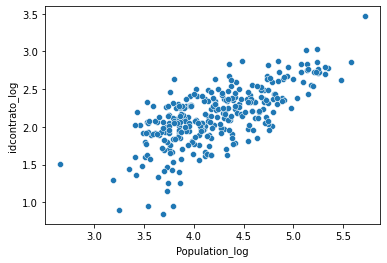

In [59]:
# scatterplot of the two variables:
sns.scatterplot(data = data_new[['Population_log','idcontrato_log']], x = 'Population_log', y = 'idcontrato_log')

In [60]:
# population and contract price are also strongly correlated (coefficient of 0.77)
data_new[['Population_log', 'precoContratual_log']].corr(method='pearson', )

,Population_log,precoContratual_log
Population_log,1.000000,0.770234
precoContratual_log,0.770234,1.000000


<AxesSubplot:xlabel='Population_log', ylabel='precoContratual_log'>

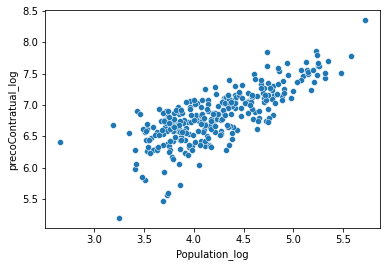

In [61]:
# scatterplot of the two variables
sns.scatterplot(data = data_new[['Population_log','precoContratual_log']], x = 'Population_log', y = 'precoContratual_log')

5. Can you build a linear model using the library Statsmodel that regresses the logarithm of the Total Value of issued procurements as a funcion of the logarithm of the population size? What is the coefficient that you find?

In [62]:
# linear regression model using the least squares method.
# Main parameters:
# straight line slope: 0.6631
# intercept: 4.0340
# R-square: 0.593


import statsmodels.formula.api as smf
formula = 'precoContratual_log ~ Population_log'
mod = smf.ols(formula = formula, data = data_new)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     precoContratual_log   R-squared:                       0.593
Model:                             OLS   Adj. R-squared:                  0.592
Method:                  Least Squares   F-statistic:                     446.3
Date:                 Sun, 30 May 2021   Prob (F-statistic):           9.92e-62
Time:                         16:34:17   Log-Likelihood:                -37.256
No. Observations:                  308   AIC:                             78.51
Df Residuals:                      306   BIC:                             85.97
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0340      0.1

<AxesSubplot:>

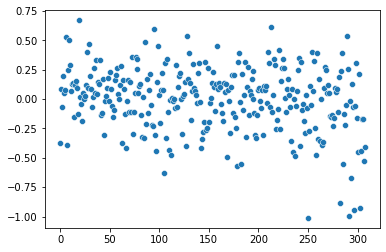

In [63]:
# scatterplot of the residual errors shows that they are reasonably well divided around the zero value, indicating a
# normal distribution
# the linear regression model seems to work well

sns.scatterplot(data = res.resid)

---

<b>[Step 7. | 2 point ]</b> Open Question. <br>
Given the dataset you have been exploring, and the analysis conducted over the municipalities procurement dataset with the population data. Can you think about a question that you consider interesting to explore? Does it require obtain additional from, for instace, pordata?

On this final step you have full control. Be creative and show us your ability to raise a question, identify which data you require to explore it, and report the results. Be as objective and clear as possible with your answer.

Use as many cells as necessary.

In [50]:
##### creation of data_edu, expenses with construction of school buildings in the period, per month
### according to the documentation, cpvID starting with 45214 is related to construction of buildings intended for education

data_edu = data_mun[['Municipality','precoContratual', 'dataCelebracaoContrato']]\
.loc[data_mun['cpvID'].str.slice(start = 0, stop = 5) == '45214']\
.groupby(['dataCelebracaoContrato','Municipality'], as_index = False).sum()

In [51]:
#### import student data from pordata. Rename municipalities to dataset default
#### the data were previously processed in excel, and are available in .\DATA\
#### sup: students enrolled in higher education
#### pre_bas_sec: students enrolled in pre-school, primary and secondary education

sup = pd.read_excel('.\DATA\sup.xlsx')
pre_bas_sec = pd.read_excel('.\DATA\pre_bas_sec.xlsx')
est = sup.append(pre_bas_sec).groupby('Municipality').sum()
est = est.stack().to_frame().reset_index()
est.rename(columns = {'level_1':'Year', 0:'studentsTotal'}, inplace = True)
est['Year'] = pd.to_datetime(est['Year'], format = '%Y')
est["Municipality"].replace({'Calheta [R.A.M.]':'Calheta', 
                                 'Castanheira de Pêra':'Castanheira de Pera', 
                                 'Calheta [R.A.A.]':'Calheta São Jorge', 
                                 'Vila da Praia da Vitória':'Praia da Vitória', 
                                 'Vila Velha de Ródão':'Vila Velha de Rádío', 
                                 'Coruche':'Coruche – Câmara Municipal', 
                                 'Lagoa [R.A.A.]':'Lagoa - Açores'
                                }, inplace=True)

<AxesSubplot:label='25047dbf-e18c-45f7-a840-f81a7f3de8b3', xlabel='dataCelebracaoContrato'>

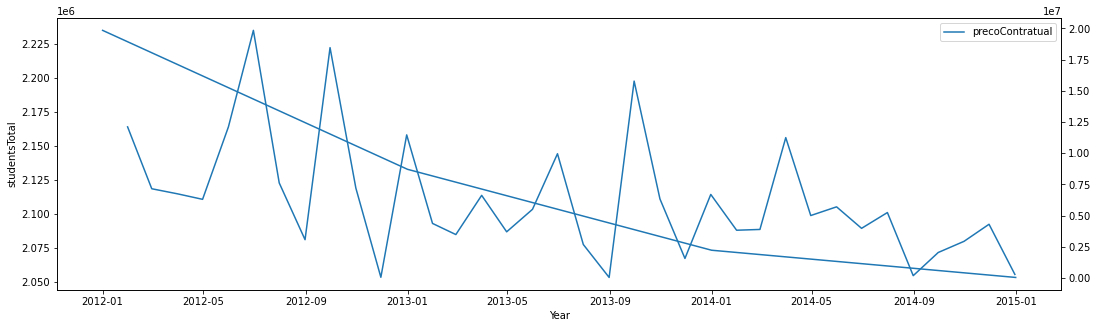

In [52]:
# we see a downward trend in spending on the construction of new school buildings, which is consistent with
# the drop in the number of students enrolled. However, is the cost per student constant in all municipalities?

plt.figure(figsize = (18, 5))
sns.lineplot(data = est[['Year', 'studentsTotal']].groupby('Year', as_index = False).sum().loc[est['Year'] <= '2015-01-01' ], x = 'Year', y = 'studentsTotal')
ax2 = plt.twinx()
sns.lineplot(data = data_edu.groupby(pd.Grouper(key = 'dataCelebracaoContrato', freq='M')).sum(), ax = ax2)

In [57]:
### assemble a dataset with the annual investment, by municipality

data_edu_year = data_edu.groupby([pd.Grouper(key = 'dataCelebracaoContrato', freq='Y'), 'Municipality']).sum().reset_index().copy()
data_edu_year['Year'] = pd.DatetimeIndex(data_edu_year['dataCelebracaoContrato']).year
data_edu_year = data_edu_year.drop('dataCelebracaoContrato', axis = 1).groupby(['Municipality', 'Year']).sum().reset_index().sort_values('precoContratual', ascending = False)

In [58]:
data_edu_year

,Municipality,Year,precoContratual
34,Braga,2012,14220691.97
62,Lisboa,2013,13382420.21
48,Espinho,2012,9424979.41
125,Sintra,2012,6000000.00
156,Óbidos,2012,5936000.00
...,...,...,...
108,Portalegre,2014,9886.66
74,Marinha Grande,2013,9620.00
3,Aguiar da Beira,2014,7500.00
109,Porto de Mós,2013,3948.50


In [59]:
# dataframe adjustments est

est['Year1'] = pd.DatetimeIndex(est['Year']).year
est.drop('Year', axis = 1, inplace = True)
est.rename({'Year1':'Year'}, axis = 1, inplace = True)

In [60]:
est

,Municipality,studentsTotal,Year
0,Abrantes,6063,2012
1,Abrantes,5882,2013
2,Abrantes,5709,2014
3,Abrantes,5600,2015
4,Abrantes,5292,2016
...,...,...,...
2459,Óbidos,1551,2015
2460,Óbidos,1586,2016
2461,Óbidos,1550,2017
2462,Óbidos,1474,2018


In [61]:
# merge of the two dataframes, with the creation of the additional InvestEst field (investment per student), dropping the fields
# that are no longer needed

data_est_final = pd.merge(est, data_edu_year, on=['Municipality', 'Year'])
data_est_final['InvestEst'] = data_est_final['precoContratual']/data_est_final['studentsTotal']
data_est_final.drop(columns = ['studentsTotal', 'precoContratual'], inplace = True)


In [62]:
data_est_final

,Municipality,Year,InvestEst
0,Abrantes,2012,25.521273
1,Aguiar da Beira,2012,153.326652
2,Aguiar da Beira,2013,34.451386
3,Aguiar da Beira,2014,11.867089
4,Alandroal,2013,513.087482
...,...,...,...
152,Águeda,2012,481.239046
153,Águeda,2013,489.883042
154,Águeda,2014,246.998321
155,Évora,2013,185.345479


In [63]:
# not all municipalities received investments in the 3 years of analysis. We will only select the
# municipalities that received investment throughout the period:

data_est_final = data_est_final.set_index(['Municipality', 'Year']).unstack()

In [64]:
data_est_final.loc[(data_est_final['InvestEst'][2012].notna()) & 
                                       (data_est_final['InvestEst'][2013].notna()) &
                                       (data_est_final['InvestEst'][2014].notna())]

InvestEst                        
Year                          2012        2013        2014
Municipality                                              
Aguiar da Beira         153.326652   34.451386   11.867089
Amares                   23.389311   20.301324   31.542593
Figueira da Foz          10.336730   10.311103    7.256732
Lisboa                    8.504974   57.954382   23.881646
Marinha Grande            0.480856    1.426876   42.833765
Matosinhos                5.327760   68.298514   65.469914
Paredes                 101.074431    1.460465    7.713325
Pombal                    8.540497  110.138587  141.509208
Santo Tirso              65.586073    4.136601    3.829365
Vila Nova de Famalicão   19.124076   78.987881   66.273570
Viseu                     5.013971    7.452955   95.997449
Águeda                  481.239046  489.883042  246.998321

__Answers:__ <br>
<div class="alert alert-block alert-info">
 
<b>Conclusions:</b> We observe that, due to demographic characteristics in Portugal, the number of students enrolled year after year has been falling, as well as the investment in the construction of buildings for educational purposes. We also conclude that not all municipalities receive the same investments in proportion to the number of students. Observing only the universe of municipalities that received investments in the 3 years of analysis of this work, a certain pattern can be seen: municipalities go through one or two years of high investment, returning to the pattern of previous investments.
    
A curious case was found in the municipality of Águeda, which has a total investment per student that is much higher than in the other municipalities studied. A possible conclusion is that, since the beginning of the millennium, Águeda has lost many industrial units to its neighbors such as Tondela and Oliveira de Frades, which have become the main hubs of the metalworking industry in the region. The high investment is perhaps explained by the attempt to recover its importance at this level, with the creation of technical schools and universities.
    
Possible continuations of this analysis would be to analyze the suppliers of these contracts and identify any pattern or check the other municipalities and find other deviations similar to Águeda. It is also interesting to look at a longer period to understand whether normalization in investment really follows the observed pattern.7
</div>

## End

Use the corresponding Moodle activity to submit your answers.
The submission should contain this notebook along with a PDF/HTML version of it archived as a single .zip file.